광고 제거

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
data = pd.read_csv('네이버 뷰 술집.csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,comment,like,url
0,0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186
1,1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056
2,2,2021. 1. 22. 10:24,서울 북부 [아현동 맛집] 37년 전통의 숨은 고수 - ...,[],33,https://blog.naver.com/nidduguy/222215890461
3,3,2021. 1. 12. 8:10,술 캐주얼한 분위기의 신당동 와인바 부우이BUOY 배달 가능 ...,[],9,https://blog.naver.com/psk2109/222204386338
4,4,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335
...,...,...,...,...,...,...
112,112,2021. 1. 12. 21:15,먹거리.맛집.카페 분위기까지 맛있는 힙지로 맛집 줄리아 ...,[],1,https://blog.naver.com/w_bell/222205300774
113,113,2021. 1. 8. 17:10,술과 나 8밸리스 까베르네 소비뇽 : 너무나도 생소한 칠레 가...,[],2,https://blog.naver.com/press_won/222200882025
114,114,2021. 1. 31. 23:33,Da(ng)ily 2020년 1월의 기록 Hodan...,[],[],https://blog.naver.com/lhojoon0817/222226977975
115,115,2021. 1. 29. 8:10,일상. vida diaria 2020년 연말정산 -4분기- 혼...,[],7,https://blog.naver.com/switchonu/222222776892


In [3]:
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     117 non-null    object
 1   review   117 non-null    object
 2   comment  117 non-null    object
 3   like     117 non-null    object
 4   url      117 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


### 광고글 특징
1. 특정 단어 포함한 게시글 : '제공받아', '지원받아','해당업체'
2. (네이버 블로그만의 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번

In [4]:
# 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있게 함
# 분석가 판단 하에 추가 광고 문구 확인하여 stopwords에 추가

Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
             '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
             '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널']


In [5]:
data = data[~data['review'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056
2,2021. 1. 22. 10:24,서울 북부 [아현동 맛집] 37년 전통의 숨은 고수 - ...,[],33,https://blog.naver.com/nidduguy/222215890461
3,2021. 1. 12. 8:10,술 캐주얼한 분위기의 신당동 와인바 부우이BUOY 배달 가능 ...,[],9,https://blog.naver.com/psk2109/222204386338
4,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335
...,...,...,...,...,...
112,2021. 1. 12. 21:15,먹거리.맛집.카페 분위기까지 맛있는 힙지로 맛집 줄리아 ...,[],1,https://blog.naver.com/w_bell/222205300774
113,2021. 1. 8. 17:10,술과 나 8밸리스 까베르네 소비뇽 : 너무나도 생소한 칠레 가...,[],2,https://blog.naver.com/press_won/222200882025
114,2021. 1. 31. 23:33,Da(ng)ily 2020년 1월의 기록 Hodan...,[],[],https://blog.naver.com/lhojoon0817/222226977975
115,2021. 1. 29. 8:10,일상. vida diaria 2020년 연말정산 -4분기- 혼...,[],7,https://blog.naver.com/switchonu/222222776892


2번

In [6]:
ix = data['review'].str.len() > 3000
data = data.loc[~ix]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056
2,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335
3,2021. 1. 18. 11:41,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...,[],0,https://blog.naver.com/yoobo1234/222211103126
4,2021. 1. 21. 10:00,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ...",[],35,https://blog.naver.com/gyfhx/222214630007
5,2021. 1. 19. 7:00,핫 플레이스 핫 플레이스<14> 레트로 감성충만 을지로 <소규...,[],47,https://blog.naver.com/dasanpartner/222211460802
6,2021. 1. 22. 1:29,b o b j i b [서울 을지로] 중식당 줄리아 ...,[],5,https://blog.naver.com/traveler_01/222215650757
7,2021. 1. 28. 17:43,"길잡이별 210127_을지로(삼곱식당,보틀러) 두두...",[],5,https://blog.naver.com/hhs_1226/222223200271
8,2021. 1. 16. 15:29,서울에서 생긴 일 구의역맛집 풘샵 신상 술집 서울토...,[],6,https://blog.naver.com/zaizzaiz/222209308954
9,2021. 1. 8. 10:03,맛집 [강남/역삼] 시원한 맥주가 있는 레트로 감성 넘치는 강...,[],27,https://blog.naver.com/lovely_peace/222200485968


In [7]:
# 기본 전처리
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus


In [8]:
# 블로그 본문, 댓글 합쳐 하나의 document로 만들기

data['doc'] = data['review'] + ' ' + data['comment']
data.head()

,time,review,comment,like,url,doc
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...
2,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...
3,2021. 1. 18. 11:41,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...,[],0,https://blog.naver.com/yoobo1234/222211103126,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...
4,2021. 1. 21. 10:00,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ...",[],35,https://blog.naver.com/gyfhx/222214630007,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ..."


In [9]:
data.doc = data.doc.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace('\s+',' ')  # white space(빈칸) 삭제

data

C:\Users\user\AppData\Local\Temp\ipykernel_10936\526420279.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_10936\526420279.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('\s+',' ')  # white space(빈칸) 삭제


,time,review,comment,like,url,doc
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186,냠냠 영등포 술집 아트몬스터 힙한 분위기 펍 수제맥주 전문점 엔 복사 이웃추가 본...
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056,서울 을지로술집 분위기좋은 을지로 와인바 추천 십분의일 디티 복사 이웃추가 본문 ...
2,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335,악마의맛집 코로나가 끝나면꼭 다녀와야하는 술집 주신당 루시퍼 복사 이웃추가 본문 ...
3,2021. 1. 18. 11:41,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...,[],0,https://blog.naver.com/yoobo1234/222211103126,유은타워 유은타워 차에 뉴트로 감성 술집 창업 추천드려요 열심히 사는 대 복사 이...
4,2021. 1. 21. 10:00,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ...",[],35,https://blog.naver.com/gyfhx/222214630007,맛집후기 신촌 술집 아무 신촌 숨은 맛집 따뜻한 분위기와 맛있는 음식 서이추 환영...
5,2021. 1. 19. 7:00,핫 플레이스 핫 플레이스<14> 레트로 감성충만 을지로 <소규...,[],47,https://blog.naver.com/dasanpartner/222211460802,핫 플레이스 핫 플레이스 레트로 감성충만 을지로 소규모와인바 다산파트너 복사 이웃...
6,2021. 1. 22. 1:29,b o b j i b [서울 을지로] 중식당 줄리아 ...,[],5,https://blog.naver.com/traveler_01/222215650757,서울 을지로 중식당 줄리아 뮥뮥뮹 복사 이웃추가 본문 기타 기능 지도로 보기 전체...
7,2021. 1. 28. 17:43,"길잡이별 210127_을지로(삼곱식당,보틀러) 두두...",[],5,https://blog.naver.com/hhs_1226/222223200271,길잡이별 을지로 삼곱식당 보틀러 두두 복사 이웃추가 본문 기타 기능 지도로 보기 ...
8,2021. 1. 16. 15:29,서울에서 생긴 일 구의역맛집 풘샵 신상 술집 서울토...,[],6,https://blog.naver.com/zaizzaiz/222209308954,서울에서 생긴 일 구의역맛집 풘샵 신상 술집 서울토박이 복사 이웃추가 본문 기타 ...
9,2021. 1. 8. 10:03,맛집 [강남/역삼] 시원한 맥주가 있는 레트로 감성 넘치는 강...,[],27,https://blog.naver.com/lovely_peace/222200485968,맛집 강남 역삼 시원한 맥주가 있는 레트로 감성 넘치는 강남역 술집 랭맥 피뚜 복...


In [10]:
tqdm.pandas()

#data['doc'] = data['doc'].progress_apply(lambda x : clean_text(x)) # 만든 함수를 적용하는건데 뭔가 오류가 있는 것 같아서 일단 사용 X

In [11]:
data.to_csv('네이버 뷰 술집(전처리).csv', encoding='utf-8-sig')

### 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해 줌
- 단어로 만드는 과정에서 
    1) 분석에 불필요한 불용어 제거 
    2) 단어를 사전형으로 처리(가고있다->가다, 있다)
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [12]:
pip install nltk

You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [13]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [14]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt

In [15]:
# 원하는 태그 추출 & 불용어 제거
okt = Okt()

# 불용어
stopwords = pd.read_csv('ko-stopwords.csv')
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) #불용어 추가

stopwords = set(stopwords)

# 형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)   # 형태소 분석, stem/norm : 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun','Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words

In [16]:
# 형태소 분석 적용
tokenizing_doc = []
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token'] = tokenizing_doc  # 새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원문을 매칭

100%|██████████| 53/53 [00:07<00:00,  7.15it/s]


In [17]:
data.token

0     [냠냠, 영등포, 술집, 아트, 몬스터, 힙, 분위기, 펍, 수제, 맥주, 전문점,...
1     [서울, 을지로, 술집, 분위기, 좋다, 을지로, 와인, 바, 추천, 십분, 디티,...
2     [악마, 맛집, 코로나, 끝나다, 꼭, 다녀오다, 야하다, 술집, 신당, 루시퍼, ...
3     [유은, 타워, 유은, 타워, 차, 뉴트, 감성, 술집, 창업, 추천, 드리다, 열...
4     [맛집, 후기, 신촌, 술집, 아무, 신촌, 숨다, 맛집, 따뜻하다, 분위기, 맛있...
5     [핫, 레이스, 핫, 레이스, 레트로, 감성, 충만, 을지로, 소규모, 와인, 바,...
6     [서울, 을지로, 중식, 줄리아, 뮥뮥뮹, 복사, 이웃, 추가, 본문, 기능, 지도...
7     [길잡이, 별, 을지로, 곱, 식당, 보, 틀다, 두두, 복사, 이웃, 추가, 본문...
8     [서울, 생기다, 구의역, 맛집, 풘샵, 신상, 술집, 서울, 토박이, 복사, 이웃...
9     [맛집, 강남, 역삼, 시원하다, 맥주, 레트로, 감성, 넘치다, 강남역, 술집, ...
10    [맛집, 동대문역, 화공, 신당, 종로, 근처, 인스타, 난리, 분위기, 좋다, 맛...
11    [을지로, 맛집, 캐, 주얼, 와인, 바, 향연, 바니, 바니, 복사, 이웃, 추가...
12    [을지로, 예쁘다, 술집, 드레싱룸, 알몽, 복사, 이웃, 추가, 본문, 기능, 지...
13    [국내, 여행, 을지로, 만선, 호프, 신년, 모이다, 좋다, 곳, 복사, 이웃, ...
14    [맛, 집, 을지로, 맛집, 추천, 유, 유, 사랑, 친구, 승피, 복사, 이웃, ...
15    [인계동, 맛집, 수원, 인계동, 활어회, 해산물, 맛집, 초장, 집, 복사, 이웃...
16    [맛집, 카페, 신당, 술집, 감성, 넘치다, 와인, 바, 코, 달리, 안주, 맛집...
17    [맛집, 카페, 을지로, 맛집, 을지, 포도, 힙지로, 힙, 술집, 송송, 

In [18]:
# 명사 추출
text_noun = [okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])
data

,time,review,comment,like,url,doc,token,text_noun
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186,냠냠 영등포 술집 아트몬스터 힙한 분위기 펍 수제맥주 전문점 엔 복사 이웃추가 본...,"[냠냠, 영등포, 술집, 아트, 몬스터, 힙, 분위기, 펍, 수제, 맥주, 전문점,...","[영등포, 술집, 아트, 몬스터, 힙, 분위기, 펍, 수제, 맥주, 전문점, 복사,..."
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056,서울 을지로술집 분위기좋은 을지로 와인바 추천 십분의일 디티 복사 이웃추가 본문 ...,"[서울, 을지로, 술집, 분위기, 좋다, 을지로, 와인, 바, 추천, 십분, 디티,...","[서울, 을지로, 술집, 분위기, 을지로, 와인, 바, 추천, 십분, 디티, 복사,..."
2,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335,악마의맛집 코로나가 끝나면꼭 다녀와야하는 술집 주신당 루시퍼 복사 이웃추가 본문 ...,"[악마, 맛집, 코로나, 끝나다, 꼭, 다녀오다, 야하다, 술집, 신당, 루시퍼, ...","[악마, 맛집, 코로나, 꼭, 술집, 신당, 루시퍼, 복사, 이웃, 추가, 본문, ..."
3,2021. 1. 18. 11:41,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...,[],0,https://blog.naver.com/yoobo1234/222211103126,유은타워 유은타워 차에 뉴트로 감성 술집 창업 추천드려요 열심히 사는 대 복사 이...,"[유은, 타워, 유은, 타워, 차, 뉴트, 감성, 술집, 창업, 추천, 드리다, 열...","[유은, 타워, 유은, 타워, 차, 뉴트, 감성, 술집, 창업, 추천, 복사, 이웃..."
4,2021. 1. 21. 10:00,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ...",[],35,https://blog.naver.com/gyfhx/222214630007,맛집후기 신촌 술집 아무 신촌 숨은 맛집 따뜻한 분위기와 맛있는 음식 서이추 환영...,"[맛집, 후기, 신촌, 술집, 아무, 신촌, 숨다, 맛집, 따뜻하다, 분위기, 맛있...","[맛집, 후기, 신촌, 술집, 아무, 신촌, 맛집, 분위기, 음식, 서이추, 환영,..."
5,2021. 1. 19. 7:00,핫 플레이스 핫 플레이스<14> 레트로 감성충만 을지로 <소규...,[],47,https://blog.naver.com/dasanpartner/222211460802,핫 플레이스 핫 플레이스 레트로 감성충만 을지로 소규모와인바 다산파트너 복사 이웃...,"[핫, 레이스, 핫, 레이스, 레트로, 감성, 충만, 을지로, 소규모, 와인, 바,...","[핫, 레이스, 핫, 레이스, 레트로, 감성, 충만, 을지로, 소규모, 와인, 바,..."
6,2021. 1. 22. 1:29,b o b j i b [서울 을지로] 중식당 줄리아 ...,[],5,https://blog.naver.com/traveler_01/222215650757,서울 을지로 중식당 줄리아 뮥뮥뮹 복사 이웃추가 본문 기타 기능 지도로 보기 전체...,"[서울, 을지로, 중식, 줄리아, 뮥뮥뮹, 복사, 이웃, 추가, 본문, 기능, 지도...","[서울, 을지로, 중식, 줄리아, 뮥뮥뮹, 복사, 이웃, 추가, 본문, 기능, 지도..."
7,2021. 1. 28. 17:43,"길잡이별 210127_을지로(삼곱식당,보틀러) 두두...",[],5,https://blog.naver.com/hhs_1226/222223200271,길잡이별 을지로 삼곱식당 보틀러 두두 복사 이웃추가 본문 기타 기능 지도로 보기 ...,"[길잡이, 별, 을지로, 곱, 식당, 보, 틀다, 두두, 복사, 이웃, 추가, 본문...","[길잡이, 별, 을지로, 곱, 식당, 보, 두두, 복사, 이웃, 추가, 본문, 기능..."
8,2021. 1. 16. 15:29,서울에서 생긴 일 구의역맛집 풘샵 신상 술집 서울토...,[],6,https://blog.naver.com/zaizzaiz/222209308954,서울에서 생긴 일 구의역맛집 풘샵 신상 술집 서울토박이 복사 이웃추가 본문 기타 ...,"[서울, 생기다, 구의역, 맛집, 풘샵, 신상, 술집, 서울, 토박이, 복사, 이웃...","[서울, 구의역, 맛집, 풘샵, 신상, 술집, 서울, 토박이, 복사, 이웃, 추가,..."
9,2021. 1. 8. 10:03,맛집 [강남/역삼] 시원한 맥주가 있는 레트로 감성 넘치는 강...,[],27,https://blog.naver.com/lovely_peace/222200485968,맛집 강남 역삼 시원한 맥주가 있는 레트로 감성 넘치는 강남역 술집 랭맥 피뚜 복...,"[맛집, 강남, 역삼, 시원하다, 맥주, 레트로, 감성, 넘치다, 강남역, 술집, ...","[맛집, 강남, 역삼, 맥주, 레트로, 감성, 강남역, 술집, 랭맥, 피뚜, 복사,..."


### wordcloud

In [19]:
# 리스트 차원 낮춰주는 함수 생성
# 하나의 리스트 안에 들어가야 하기 때문에 늘려주는 작업

def flatten(i):
    flatlist = []
    for elem in i :
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [20]:
data1 = data.token.tolist() # series -> list
data2 = flatten(data1)
data2[:20]

['냠냠',
 '영등포',
 '술집',
 '아트',
 '몬스터',
 '힙',
 '분위기',
 '펍',
 '수제',
 '맥주',
 '전문점',
 '복사',
 '이웃',
 '추가',
 '본문',
 '기능',
 '지도',
 '보기',
 '전체',
 '도지']

In [21]:
text = nltk.Text(data2)
text

<Text: 냠냠 영등포 술집 아트 몬스터 힙 분위기 펍...>

In [22]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [23]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

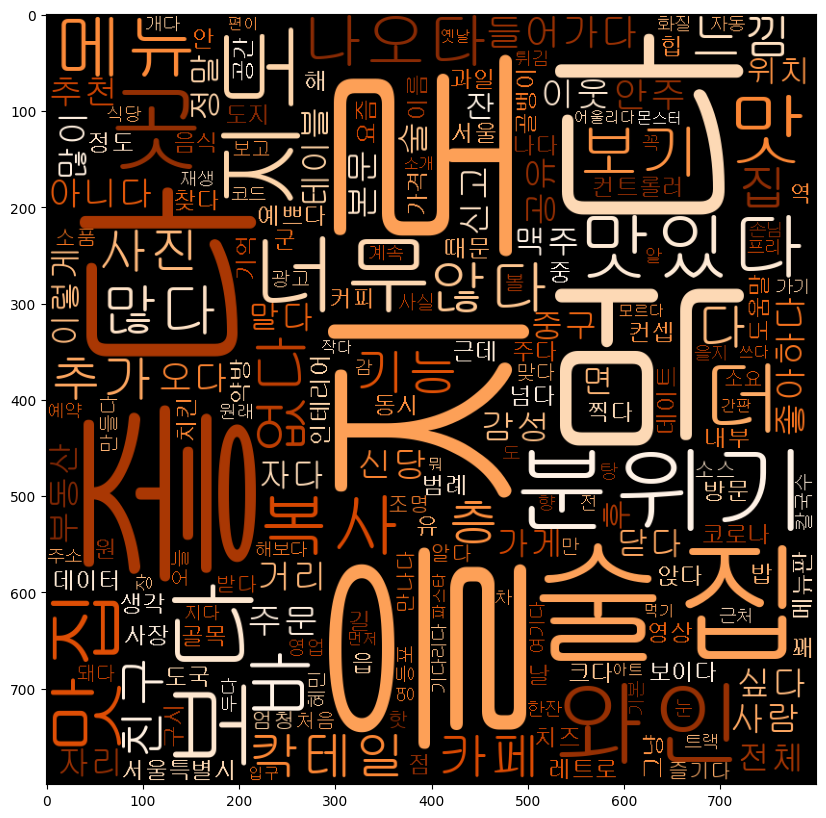

In [24]:
# 명사, 동사, 형용사, 부사로 워드클라우드

font_path = 'C:\Windows\Fonts\gulim.ttc'

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

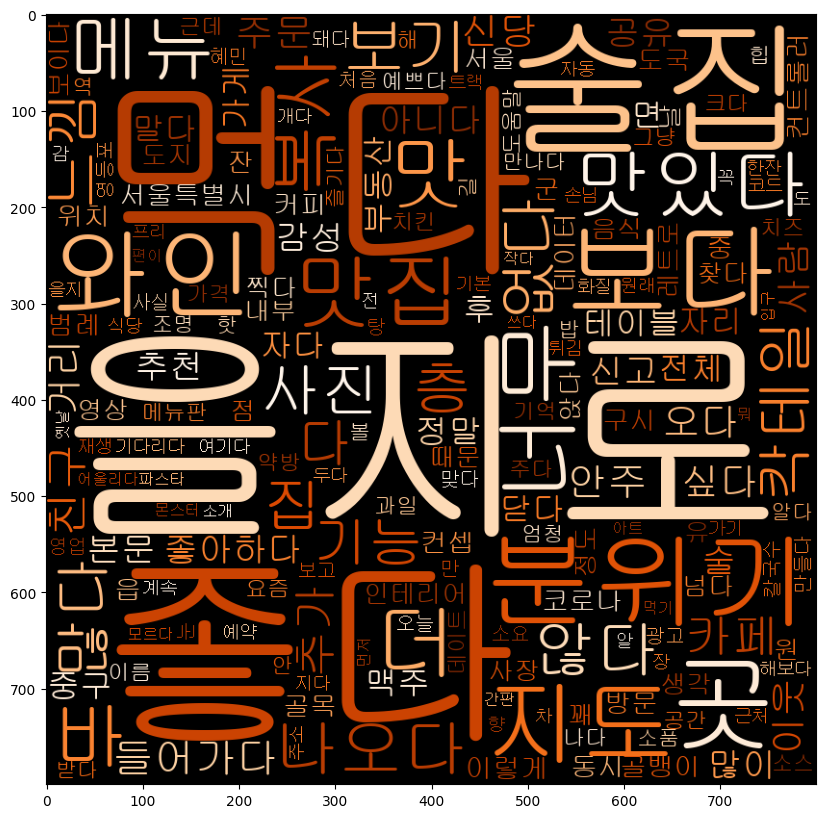

In [25]:
# 명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()


### 군집분석 - Clustering(Actor 도출)
- 단어가 많이 나온다고 무조건 중요한 단어가 아니라 
- 이 문서에만 독특하게 나오는 단어들이 중요하다고 생각하고 뽑아내는 코드 작성

### tf-idf

In [26]:
data3 = []

for i in data1:
    string = i[0]
    for w in i[1:]: # 첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " "   # 단어 사이는 띄어쓰기로 연결
        string += w # 띄어쓰기 후 다음 단어 써주기 반복
    data3.append(string)
data3   # 쉼표 기준으로 document가 구분됨

['냠냠 영등포 술집 아트 몬스터 힙 분위기 펍 수제 맥주 전문점 복사 이웃 추가 본문 기능 지도 보기 전체 도지 닫다 공유 신고 위치 아트 몬스터 영등포 점 영등포 술집 아트 몬스터 힙 분위기 수제 맥주 전문점 영등포 술집 아트 몬스터 아트 몬스터 수제 맥주 맛집 유명하다 을지로 강남 익선동 성수 지점 꽤 많다 편이 친구 영등포 자주 만나다 편이 뭐 먹다 외관 분위기 이끌다 들어가다 돼다 입구 분위기 핫 영등포 않다 힙 로랑 자다 어울리다 분위기 서울 영등포구 영등포 길 평일 토요일 일요일 단체 석 포장 배달 예약 무선 인터넷 남 녀 화장실 구분 아트 몬스터 영등포 점 사진 동영상 팔로워 명 팔로잉 명 게시 물 아트 몬스터 영등포 점 님 사진 동영상 보기 내부 분위기 역시 힙해 힙 두운 분위기 좋아하다 강추 곳곳 네온사인 꽤 많다 편이 그냥 찍기 해도 인스타 감성 낭낭 분위기 연출 가득 아트 몬스터 영등포 점 층 매장 크다 편이 층 커플 친구 온 손님 많다 층 단체 석 많다 앉다 편하다 화장실 남녀 구분 펴다 층 층 먹다 올라가다 살짝 불편하다 없다 않다 아트 몬스터 메뉴판 신문지 국제 맥주 대회 수상 스토리 맥주 맛 대한 설명 지점 이야기 다양하다 적히다 맞다 맥주 찾기 맥주 맛 자다 못 찾다 싶다 땐 참고 좋다 친구 수제 맥주 맛 자다 모르다 가볍다 맛 과일 향 괜찮다 맥주 고르다 취향 따르다 고르다 먹다 재미 재밌다 간단하다 차로 맥주 한잔 오다 손님 많다 사이드 메뉴 많다 맥주 종류 많다 맥주 안주 더 꽂히다 편밥 안 먹다 차로 방문 곳 피자 감자 튀김 주문 맥주 나오다 설명 대로 찾다 주문 주문 수제 맥주 운 청담동 며느리 맥주 이름 너무 재밌다 운 고르다 가볍다 맛 생맥주 청담동 며느리 친구 고르다 생맥 흑 맥 사이 맛 개인 흑 맥 딥 싫어하다 편 운 그나마 가볍다 맛 입맛 더 자다 맞다 사실 맥주 소주 최고 맥주 제일 먼저 나오다 순서대로 나오다 걸리다 맥주 양 많다 편이 아니다 잔 말다 나오다 맥주 많이 좋아하다 편이 아니다 잔 끝내다 종류 다

In [27]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already up-to-date: scikit-learn in c:\users\user\appdata\local\programs\python\python38\lib\site-packages (1.1.3)



You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [30]:
from collections import defaultdict

word2id = defaultdict(lambda:0)    # value가 없는 key인 경우 error대신 0을 출력

In [31]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
# 단어들을 수치로 변환

In [33]:
tfidf[3]

[('유은', 0.42858800218021603),
 ('타워', 0.25875697975559825),
 ('유은', 0.42858800218021603),
 ('타워', 0.25875697975559825),
 ('차', 0.030112214362625223),
 ('뉴트', 0.14286266739340533),
 ('감성', 0.024816953987515548),
 ('술집', 0.1524496529114502),
 ('창업', 0.12937848987779912),
 ('추천', 0.08264697353539363),
 ('드리다', 0.12491367366415),
 ('열심히', 0.05060034489598077),
 ('살다', 0.048379979979186444),
 ('대다', 0.05316356808014145),
 ('복사', 0.016938850323494466),
 ('이웃', 0.016938850323494466),
 ('추가', 0.016938850323494466),
 ('본문', 0.016938850323494466),
 ('기능', 0.016938850323494466),
 ('공유', 0.016938850323494466),
 ('신고', 0.016938850323494466),
 ('안녕하다', 0.04308471960407676),
 ('유은', 0.42858800218021603),
 ('타워', 0.25875697975559825),
 ('윤보', 0.07143133369670267),
 ('람', 0.030112214362625223),
 ('과장', 0.07143133369670267),
 ('새벽', 0.06468924493889956),
 ('눈', 0.030112214362625223),
 ('오다', 0.024816953987515548),
 ('출근', 0.059905656837944556),
 ('차', 0.030112214362625223),
 ('눈', 0.030112214362625223),

### 토픽 개수 정하기

In [34]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [35]:
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

In [36]:
dictionary = corpora.Dictionary(data1)
dictionary

In [37]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왔는지
corpus = [dictionary.doc2bow(text) for text in data1]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 5),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 5),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 4),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 9),
  (75, 3),
  (76, 2),
  (77, 8),
  (78, 2),
  (79, 5),
  (80, 2),
  (81, 1),
  (82, 2),
  (83, 25),
  (84, 1),
  (85, 7),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 2),
  (91, 1

In [38]:
values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))
    # perplexity(혼잡도) : 클러스터링 안의 결과들 간의 유사성 확인
    # 낮을수록 좋음

Text(0, 0.5, 'Score')

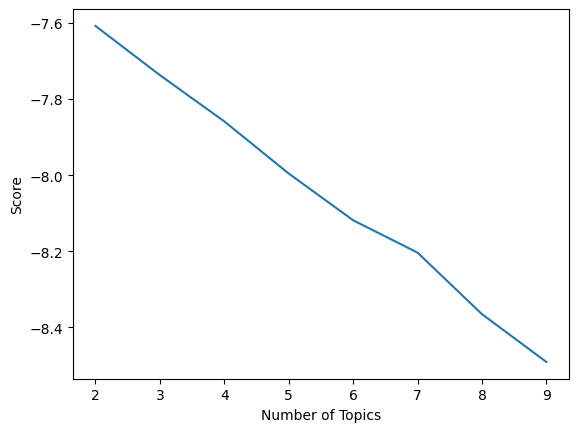

In [39]:
x = range(2,10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')
# 꺾이는 부분을 기준으로 군집을 나눔
# 원본을 보고 그래프와 비슷한 경향인지 확인

In [40]:
# coherence 확인(군집 평가)
# coherence 높을수록 일관성 높음 -> 좋음
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = data1, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


KeyboardInterrupt: 

Text(0, 0.5, 'Score')

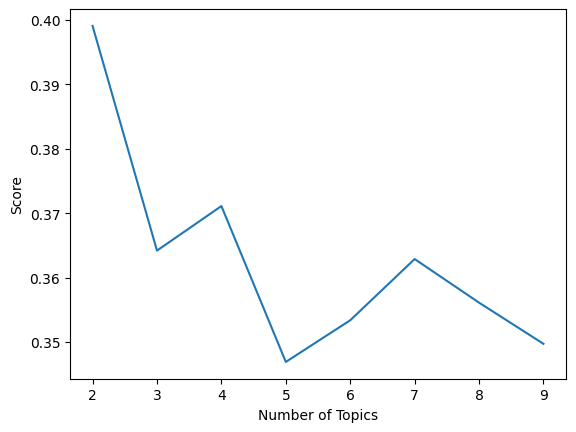

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

for문 안에 두 개 다 넣으면 coherence_values 리스트에 값이 제대로 안들어감... 왜???
- ldamodel 변수명과 model=ldamodel 인자의 이름이 똑같아서 모델이 잘못 돌아가는 것 같음
- 변수명을 변경해보고 다시 돌려보고 결과 보기 

In [ ]:
coherence_values1 = []
values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_model_lda.get_coherence()
    coherence_values1.append(coherence_model_lda)

In [ ]:
coherence_values1

In [ ]:
coherence_values2 = []
values = []

for i in range(2,10):
    a = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(a.log_perplexity(corpus))
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_model_lda.get_coherence()
    coherence_values2.append(coherence_model_lda)

In [ ]:
coherence_values2

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values1)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

### ward clustering
- 데이터의 수직적 구조를 파악할 수 있음

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc   # 수직적 구조 그릴 수 있는 기능

In [ ]:
sp_matrix1 = vectorizer.fit_transform(data3)
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
result = cluster.fit_predict(df1)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_ward = data.copy()
df_ward['클러스터'] = list(result)  # 클러스터 배치 확인
df_ward.head()

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2021. 1. 11. 21:18,냠냠 영등포 술집 아트몬스터 - 힙한 분위기 펍 수제맥주...,[],14,https://blog.naver.com/blossomnn/222204199186,냠냠 영등포 술집 아트몬스터 힙한 분위기 펍 수제맥주 전문점 엔 복사 이웃추가 본...,"[냠냠, 영등포, 술집, 아트, 몬스터, 힙, 분위기, 펍, 수제, 맥주, 전문점,...","[영등포, 술집, 아트, 몬스터, 힙, 분위기, 펍, 수제, 맥주, 전문점, 복사,...",0
1,2021. 1. 22. 13:26,서울 [을지로술집] 분위기좋은 을지로 와인바 추천 : 십분의일...,[],22,https://blog.naver.com/qls1021/222216086056,서울 을지로술집 분위기좋은 을지로 와인바 추천 십분의일 디티 복사 이웃추가 본문 ...,"[서울, 을지로, 술집, 분위기, 좋다, 을지로, 와인, 바, 추천, 십분, 디티,...","[서울, 을지로, 술집, 분위기, 을지로, 와인, 바, 추천, 십분, 디티, 복사,...",4
2,2021. 1. 15. 15:12,악마의맛집 코로나가 끝나면꼭! 다녀와야하는 술집 주신당 ...,[],4,https://blog.naver.com/dbrrkq12/222208287335,악마의맛집 코로나가 끝나면꼭 다녀와야하는 술집 주신당 루시퍼 복사 이웃추가 본문 ...,"[악마, 맛집, 코로나, 끝나다, 꼭, 다녀오다, 야하다, 술집, 신당, 루시퍼, ...","[악마, 맛집, 코로나, 꼭, 술집, 신당, 루시퍼, 복사, 이웃, 추가, 본문, ...",0
3,2021. 1. 18. 11:41,유은타워7th 유은타워7차에 뉴트로 감성 술집 창업 추천드려요...,[],0,https://blog.naver.com/yoobo1234/222211103126,유은타워 유은타워 차에 뉴트로 감성 술집 창업 추천드려요 열심히 사는 대 복사 이...,"[유은, 타워, 유은, 타워, 차, 뉴트, 감성, 술집, 창업, 추천, 드리다, 열...","[유은, 타워, 유은, 타워, 차, 뉴트, 감성, 술집, 창업, 추천, 복사, 이웃...",0
4,2021. 1. 21. 10:00,"맛집후기 신촌 술집 아무(Amu) - 신촌 숨은 맛집, ...",[],35,https://blog.naver.com/gyfhx/222214630007,맛집후기 신촌 술집 아무 신촌 숨은 맛집 따뜻한 분위기와 맛있는 음식 서이추 환영...,"[맛집, 후기, 신촌, 술집, 아무, 신촌, 숨다, 맛집, 따뜻하다, 분위기, 맛있...","[맛집, 후기, 신촌, 술집, 아무, 신촌, 맛집, 분위기, 음식, 서이추, 환영,...",0


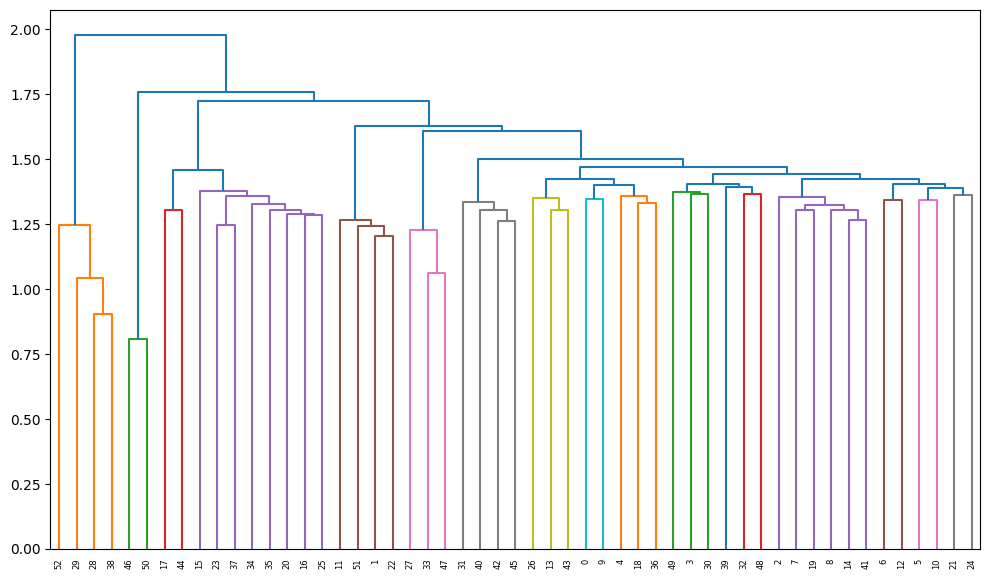

In [ ]:
plt.figure(figsize=(12,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))
# y축을 기준으로 클러스터 개수를 나눔

In [ ]:
import pickle
df_ward.to_pickle('을지로신당 술집_cluster.pkl')
df_ward.to_csv('을지로신당 술집_clustering.csv', encoding='utf-8-sig')